In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

As NBA statistical modeler Kostya Medvedovsky recently pointed on twitter, the impact of home court advantage has been declining over time in the NBA. 

The goal of this analysis is to better understand what factors contributed to the decline in the effect of home court advantage over time. 
- Explore the relationship between team travel and team performance
- Explore how NBA travel has evolved over time

Hypothesis to Test
- NBA has learned to better optimize travel schedules. The decreaesd travel load has mitigated the impact of home court advantage over time. 

Motivation: https://twitter.com/kmedved/status/1397306436347170821

2021


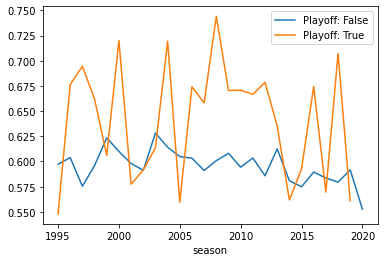

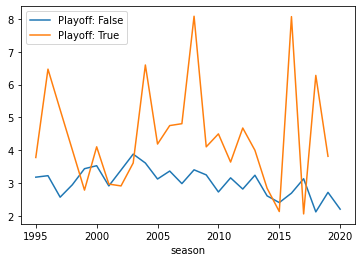

In [41]:
df = pd.read_csv('data/nba_game_outcomes.csv', parse_dates=['date'])
print(df[df.playoff].season.max())


df = (
    df[(df.season >= 1995) & 
       (df.season <= 2020) &
        (df.neutral == 0)].
    assign(home_team_wins = lambda x: (x.score1 > x.score2).astype('int'),
          home_team_diff = lambda x: (x.score1 - x.score2))
    )

for p in df.playoff.unique():
    df.loc[df.playoff == p].groupby(['season'])['home_team_wins'].mean().plot(label=f"Playoff: {p}")

plt.legend()
plt.show()

for p in df.playoff.unique():
    df.loc[df.playoff == p].groupby(['season'])['home_team_diff'].mean().plot(label=f"Playoff: {p}")

plt.legend()
plt.show()

In [43]:
df.tail()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,carm.elo2_post,raptor1_pre,raptor2_pre,raptor_prob1,raptor_prob2,score1,score2,game_uid,home_team_wins,home_team_diff
69372,2020-03-10,2020,0,False,GSW,LAC,1367.967488,1626.468250,0.286508,0.713492,...,NaN,1224.244931,1729.395887,0.086024,0.913976,107.0,131.0,69373,0,-24.0
69373,2020-03-11,2020,0,False,PHI,DET,1560.465131,1344.474388,0.860445,0.139555,...,NaN,1568.346949,1210.608513,0.924544,0.075456,124.0,106.0,69374,1,18.0
69374,2020-03-11,2020,0,False,MIA,CHO,1577.722492,1372.155980,0.853082,0.146918,...,NaN,1504.470797,1316.707284,0.832107,0.167893,98.0,109.0,69375,0,-11.0
69375,2020-03-11,2020,0,False,ATL,NYK,1355.488051,1333.783863,0.668318,0.331682,...,NaN,1379.244752,1300.062453,0.789955,0.210045,131.0,136.0,69376,0,-5.0
69376,2020-03-11,2020,0,False,DAL,DEN,1573.615531,1589.273109,0.619049,0.380951,...,NaN,1611.694684,1641.038796,0.533055,0.466945,113.0,97.0,69377,1,16.0


In [37]:
df.playoff.unique()

array([False,  True])

In [31]:
df[df.playoff]

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,carm.elo2_post,raptor1_pre,raptor2_pre,raptor_prob1,raptor_prob2,score1,score2,game_uid,home_team_wins,home_team_diff
37969,1995-04-27,1995,0,True,SEA,LAL,1688.3710,1505.5339,0.835915,0.164085,...,NaN,NaN,NaN,NaN,NaN,96.0,71.0,37970,1,25.0
37970,1995-04-27,1995,0,True,NYK,CLE,1623.5875,1484.4396,0.798452,0.201548,...,NaN,NaN,NaN,NaN,NaN,103.0,79.0,37971,1,24.0
37971,1995-04-27,1995,0,True,UTA,HOU,1676.4249,1530.9219,0.804275,0.195725,...,NaN,NaN,NaN,NaN,NaN,102.0,100.0,37972,1,2.0
37972,1995-04-27,1995,0,True,IND,ATL,1612.4430,1542.4812,0.726786,0.273214,...,NaN,NaN,NaN,NaN,NaN,90.0,82.0,37973,1,8.0
37973,1995-04-28,1995,0,True,SAS,DEN,1693.6779,1563.6819,0.789840,0.210160,...,NaN,NaN,NaN,NaN,NaN,104.0,88.0,37974,1,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63152,2015-06-07,2015,0,True,GSW,CLE,1806.2035,1708.1705,0.757674,0.242326,...,NaN,NaN,NaN,NaN,NaN,93.0,95.0,63153,0,-2.0
63153,2015-06-09,2015,0,True,CLE,GSW,1716.8708,1797.5032,0.527843,0.472157,...,NaN,NaN,NaN,NaN,NaN,96.0,91.0,63154,1,5.0
63154,2015-06-11,2015,0,True,CLE,GSW,1723.4149,1790.9591,0.546572,0.453428,...,NaN,NaN,NaN,NaN,NaN,82.0,103.0,63155,0,-21.0
63155,2015-06-14,2015,0,True,GSW,CLE,1809.9791,1704.3949,0.765565,0.234435,...,NaN,NaN,NaN,NaN,NaN,104.0,91.0,63156,1,13.0


In [34]:
df[df.season == 2019].tail()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,carm.elo2_post,raptor1_pre,raptor2_pre,raptor_prob1,raptor_prob2,score1,score2,game_uid,home_team_wins,home_team_diff
68401,2019-06-02,2019,0,False,TOR,GSW,1701.891364,1704.811887,0.636183,0.363817,...,1717.673490,1799.366240,1748.394689,0.697966,0.302034,104.0,109.0,68402,0,-5.0
68402,2019-06-05,2019,0,False,GSW,TOR,1714.519966,1692.183286,0.669124,0.330876,...,1714.917881,1700.744728,1800.130279,0.490179,0.509821,109.0,123.0,68403,0,-14.0
68403,2019-06-07,2019,0,False,GSW,TOR,1695.440547,1711.262705,0.618826,0.381174,...,1731.123131,1764.895904,1803.536206,0.576980,0.423020,92.0,105.0,68404,0,-13.0
68404,2019-06-10,2019,0,False,TOR,GSW,1727.522337,1679.180914,0.701389,0.298611,...,1688.686606,1806.398099,1842.700562,0.583034,0.416966,105.0,106.0,68405,0,-1.0
68405,2019-06-13,2019,0,False,GSW,TOR,1685.614288,1721.088963,0.591806,0.408194,...,1732.748723,1755.308662,1805.338192,0.560902,0.439098,110.0,114.0,68406,0,-4.0
